In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
from scipy.interpolate import PPoly
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from pyslabgrid import circ as circ
from pyslabgrid import slabrup as slabrup

In [2]:
# Aug 2, 2022 - revised with bounds 45 degrees instead of 90 degrees 
# for more rigourous classification of strikes

dump_hik = slabrup.get_GeoNetevents('hik')
dump_puy = slabrup.get_GeoNetevents('puy')
slabevents = {'hik': dump_hik, 'puy': dump_puy}

The adopted paradigm is illustrated by the following:

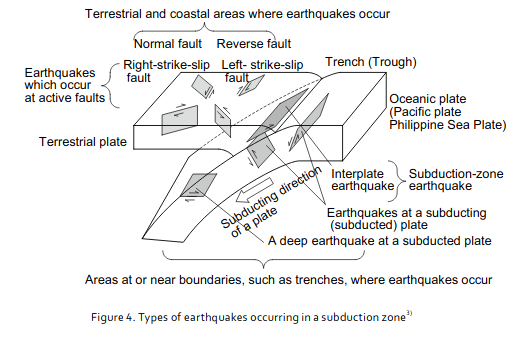

https://www.jaso.jp/pdf/earthquake_resistant.pdf

In [3]:
critical_dip = {'hik': 45, 'puy': 0}
# trnsition dip for strike-chnage
# process_strikediprake(slabevents, szone, critical_dip=None):
dump_hik = slabrup.process_strikediprake(slabevents, 'hik', critical_dip=critical_dip)
dump_puy = slabrup.process_strikediprake(slabevents, 'puy', critical_dip=critical_dip)
procslabevents  = {'hik': dump_hik, 'puy': dump_puy,}

print('Number of events - Hikurangi: %d, Puysegur: %d' \
      %(len(slabevents['hik']['strike1']),len(slabevents['puy']['strike1'])))

Number of events - Hikurangi: 399, Puysegur: 76


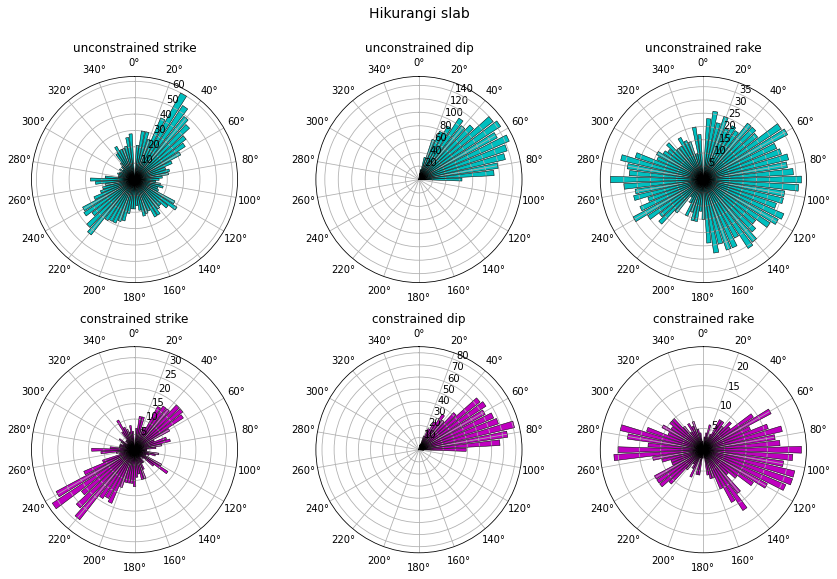

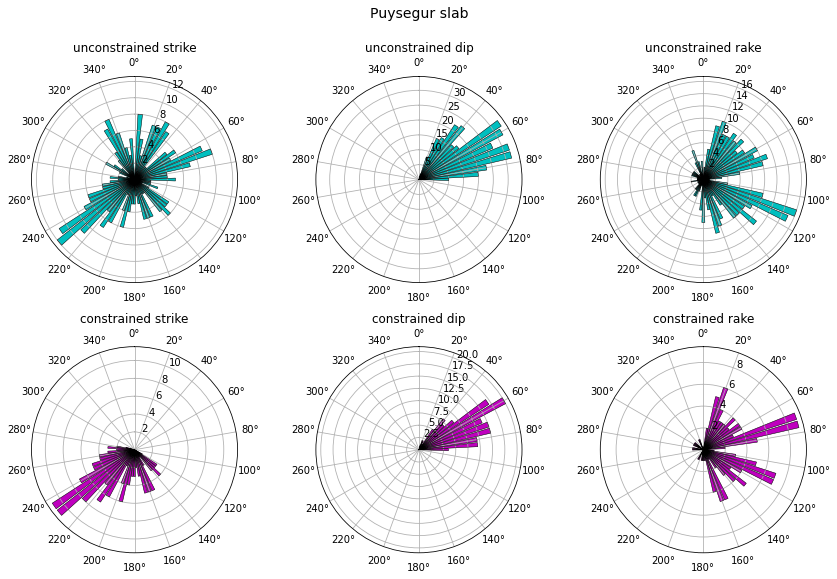

In [4]:
# let us see how the strike, dip & rakes looks like
dump_hik = slabrup.get_allstrikediprakes(slabevents, 'hik')
dump_puy = slabrup.get_allstrikediprakes(slabevents, 'puy')
xslabevents = {'hik': dump_hik, 'puy': dump_puy}

slabrup.review_strikediprake(xslabevents, procslabevents, 'hik')
plt.show()
slabrup.review_strikediprake(xslabevents, procslabevents, 'puy')

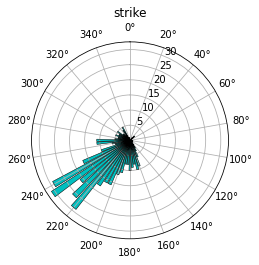

45.610075414949186
225.80513821071716 229.15845764670436 222.45181877472996
56.8480563958463
48.53908769814801 53.019342180151384 44.058833216144635


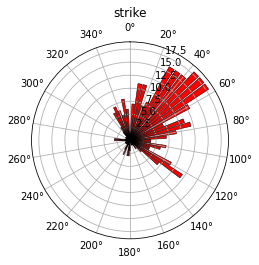

(array([37., 50., 25., 20., 26., 44., 78., 27., 14., 25.]),
 array([  1. ,  36.7,  72.4, 108.1, 143.8, 179.5, 215.2, 250.9, 286.6,
        322.3, 358. ]),
 <BarContainer object of 10 artists>)

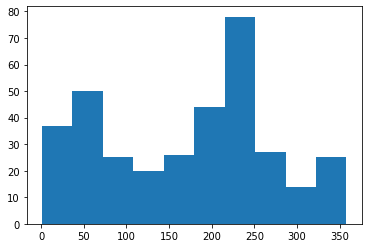

In [5]:

szone = 'hik'
strike = procslabevents['hik']['strike']
dep = procslabevents['hik']['dep']
dip = procslabevents['hik']['dip']
depthcut = 90
upperstrike, lowerstrike = [],[]
for s, d in zip(strike, dep):
    if d<depthcut:
        #if (s< 170) | (s>255):
        #    continue
        upperstrike.append(s)
    else:
        # if s>90:
        #    continue
        lowerstrike.append(s)
        
fig = plt.figure(1, figsize=(12,8))
ax1 = fig.add_subplot(231, projection='polar')
slabrup.plot_hist(upperstrike, ax=ax1, stitle ='strike', facecolor='c')
plt.show()
fig = plt.figure(1, figsize=(12,8))
ax1 = fig.add_subplot(231, projection='polar')
slabrup.plot_hist(lowerstrike, ax=ax1, stitle ='strike', facecolor='r')
cmean, cstd = circ.meanstats(upperstrike, high=360, stdev=True)
print(cstd)
cstd = cstd/np.sqrt(len(upperstrike))
print(cmean, cmean+cstd, cmean-cstd)

cmean, cstd = circ.meanstats(lowerstrike, high=360, stdev=True)
print(cstd)
cstd = cstd/np.sqrt(len(lowerstrike))
print(cmean, cmean+cstd, cmean-cstd)


#plt.plot(strike, dep, 'o')
#plt.grid()
plt.show()
plt.hist(strike)

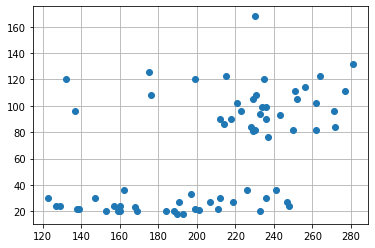

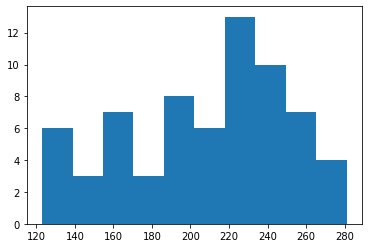

31.12701188111877
222.26640184051175 253.3934137216305 191.139389959393


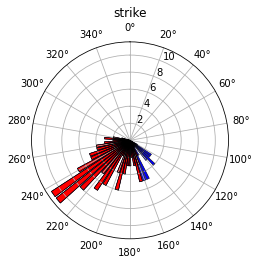

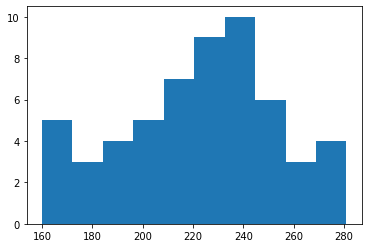

In [6]:
szone = 'puy'
strike = procslabevents[szone]['strike']
dep = procslabevents[szone]['dep']
dip = procslabevents[szone]['dip']
plt.plot(strike, dep, 'o')
plt.grid()
plt.show()
plt.hist(strike)
plt.show()
depthcut = 0
mystrike = []
for s, d in zip(strike, dep):
    if (s >300)|(s < 160):
        continue

    mystrike.append(s)
    
fig = plt.figure(1, figsize=(12,8))
ax1 = fig.add_subplot(231, projection='polar')
slabrup.plot_hist(strike, ax=ax1, stitle ='strike', facecolor='b')
slabrup.plot_hist(mystrike, ax=ax1, stitle ='strike', facecolor='r')

cmean, cstd = circ.meanstats(mystrike, high=360, stdev=True)
print(cstd)
#cstd = cstd/np.sqrt(len(upperstrike))
print(cmean, cmean+cstd, cmean-cstd)


#plt.plot(strike, dep, 'o')
#plt.grid()
plt.show()
plt.hist(mystrike)
plt.show()
